<a href="https://colab.research.google.com/github/alm36918/ciencia-de-dados/blob/master/prophet_covid_palmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importanto bibliotecas "base"
Importando Pandas e Numpy para manipulação dos dados.


In [70]:
import pandas as pd
import numpy as np

In [71]:
from fbprophet import Prophet

#Dataset da cidade de Palmas, TO
Dataset extraído do Projeto Brasil IO (https://brasil.io/covid19/)

In [72]:
covid_palmas = pd.read_csv("/content/drive/MyDrive/Cursos/autodidata/covidpalmas/df_covid_palmas.csv")
covid_palmas.head(5)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
0,202134,2021-08-27,528,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
1,202134,2021-08-26,527,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
2,202134,2021-08-25,526,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
3,202134,2021-08-24,525,TO,Palmas,1721000,city,49899,16291.10403,83,617,0,0.0124,306296,True,False
4,202134,2021-08-23,524,TO,Palmas,1721000,city,49816,16264.00606,321,617,0,0.0124,306296,False,False


In [73]:
covid_palmas.rename(columns={"last_available_deaths":"mortes"}, inplace=True)

In [74]:
covid_palmas.head(5)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,mortes,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
0,202134,2021-08-27,528,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
1,202134,2021-08-26,527,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
2,202134,2021-08-25,526,TO,Palmas,1721000,city,49899,16291.10403,0,617,0,0.0124,306296,False,True
3,202134,2021-08-24,525,TO,Palmas,1721000,city,49899,16291.10403,83,617,0,0.0124,306296,True,False
4,202134,2021-08-23,524,TO,Palmas,1721000,city,49816,16264.00606,321,617,0,0.0124,306296,False,False


#Agrupamento por Data
Para que a gente consiga saber a evolução diária, precisamos agrupar por data.

In [75]:
mortes_palmas = covid_palmas.groupby("date").sum()["mortes"].reset_index()
mortes_palmas.tail()

,date,mortes
523,2021-08-23,617
524,2021-08-24,617
525,2021-08-25,617
526,2021-08-26,617
527,2021-08-27,617


#Plotando o número de mortes num Gráfico

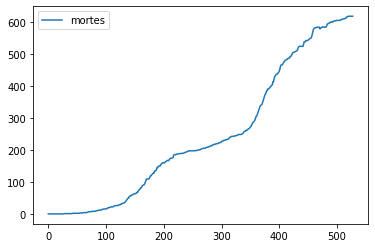

In [76]:
mortes_palmas.plot()

#Prophet
Em Fevereiro de 2017 a Facebook Research lançou publicamente uma ferramenta open source para forecasting, chama-se Facebook Prophet. A ferramenta está disponível no GitHub para uso em Phython ou R.


A ferramenta visa contribuir para problemas de geração de previsões e cenários futuros para séries temporais. Veja as características do Prophet (em que ele brilha, segundo o site):

> Observações horárias, diárias ou semanais com pelo menos alguns meses (preferivelmente um ano) de histórico.
Fortes sazonalidades múltiplas em “escala humana”: dia da semana e época do ano.
Feriados importantes que ocorrem em intervalos irregulares que são conhecidos antecipadamente (por exemplo, o Super Bowl).
Um número razoável de observações ausentes ou grandes outliers,
mudanças históricas de tendência, por exemplo, devido a lançamentos de produtos ou alterações no registro.
Tendências que são curvas de crescimento não lineares, em que uma tendência atinge um limite natural ou satura.

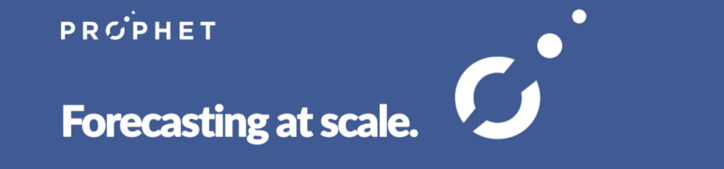




In [77]:
mortes_palmas.tail()

,date,mortes
523,2021-08-23,617
524,2021-08-24,617
525,2021-08-25,617
526,2021-08-26,617
527,2021-08-27,617


In [78]:
mortes_palmas.columns = ["ds", "y"]
mortes_palmas.tail()

,ds,y
523,2021-08-23,617
524,2021-08-24,617
525,2021-08-25,617
526,2021-08-26,617
527,2021-08-27,617


#Previsão de Mortes pela Covid19 em Palmas
Previsão de uma semana (periods=30), com intervalo de confiança de 95%.

In [79]:
dias = 30

In [80]:
m = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)
m.fit(mortes_palmas)
futuro = m.make_future_dataframe(periods=dias)

In [81]:
futuro.tail(dias)

,ds
528,2021-08-28
529,2021-08-29
530,2021-08-30
531,2021-08-31
532,2021-09-01
533,2021-09-02
534,2021-09-03
535,2021-09-04
536,2021-09-05
537,2021-09-06


In [82]:
previsao = m.predict(futuro)
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
528,2021-08-28,524.533781,616.830092,626.194863,524.533781,524.533781,97.089551,97.089551,97.089551,51.629988,51.629988,51.629988,0.305624,0.305624,0.305624,45.153939,45.153939,45.153939,0.0,0.0,0.0,621.623332
529,2021-08-29,525.314977,617.894596,626.940277,525.278863,525.361756,97.179720,97.179720,97.179720,51.629988,51.629988,51.629988,0.028284,0.028284,0.028284,45.521447,45.521447,45.521447,0.0,0.0,0.0,622.494697
530,2021-08-30,526.096174,618.674058,628.284942,525.941331,526.323152,97.207143,97.207143,97.207143,51.629988,51.629988,51.629988,-0.371387,-0.371387,-0.371387,45.948542,45.948542,45.948542,0.0,0.0,0.0,623.303317
531,2021-08-31,526.877370,619.801102,629.854294,526.587636,527.277689,97.871229,97.871229,97.871229,51.629988,51.629988,51.629988,-0.189590,-0.189590,-0.189590,46.430831,46.430831,46.430831,0.0,0.0,0.0,624.748599
532,2021-09-01,527.658567,621.322716,631.003794,527.154003,528.339955,98.626996,98.626996,98.626996,51.629988,51.629988,51.629988,0.034054,0.034054,0.034054,46.962954,46.962954,46.962954,0.0,0.0,0.0,626.285562
533,2021-09-02,528.439763,622.664415,632.163199,527.680112,529.478594,99.067972,99.067972,99.067972,51.629988,51.629988,51.629988,-0.100710,-0.100710,-0.100710,47.538695,47.538695,47.538695,0.0,0.0,0.0,627.507736
534,2021-09-03,529.220960,624.591314,634.183448,528.162621,530.646655,100.074815,100.074815,100.074815,51.629988,51.629988,51.629988,0.293726,0.293726,0.293726,48.151101,48.151101,48.151101,0.0,0.0,0.0,629.295774
535,2021-09-04,530.002156,625.793158,636.423543,528.459675,531.751660,100.728237,100.728237,100.728237,51.629988,51.629988,51.629988,0.305624,0.305624,0.305624,48.792625,48.792625,48.792625,0.0,0.0,0.0,630.730393
536,2021-09-05,530.783352,626.737989,636.947406,528.898805,532.888563,101.113549,101.113549,101.113549,51.629988,51.629988,51.629988,0.028284,0.028284,0.028284,49.455276,49.455276,49.455276,0.0,0.0,0.0,631.896901
537,2021-09-06,531.564549,628.064936,638.306221,529.183123,534.021254,101.389376,101.389376,101.389376,51.629988,51.629988,51.629988,-0.371387,-0.371387,-0.371387,50.130775,50.130775,50.130775,0.0,0.0,0.0,632.953925


In [83]:
previsao[["ds", "yhat_lower", "yhat", "yhat_upper"]].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
528,2021-08-28,616.830092,621.623332,626.194863
529,2021-08-29,617.894596,622.494697,626.940277
530,2021-08-30,618.674058,623.303317,628.284942
531,2021-08-31,619.801102,624.748599,629.854294
532,2021-09-01,621.322716,626.285562,631.003794
533,2021-09-02,622.664415,627.507736,632.163199
534,2021-09-03,624.591314,629.295774,634.183448
535,2021-09-04,625.793158,630.730393,636.423543
536,2021-09-05,626.737989,631.896901,636.947406
537,2021-09-06,628.064936,632.953925,638.306221


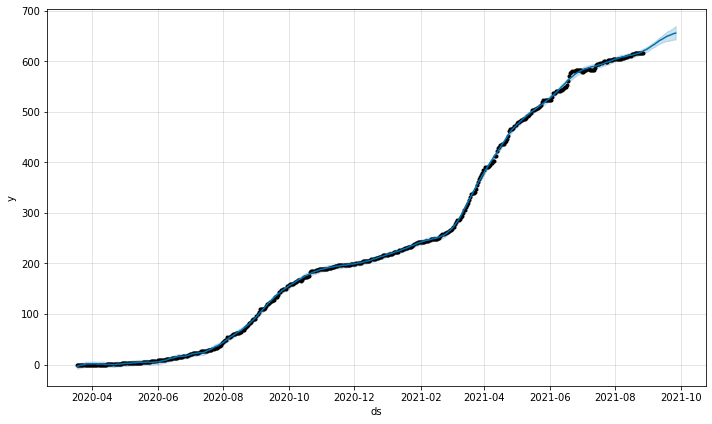

In [84]:
confirmed_forecast_plot = m.plot(previsao)